# Neural Network Quantum States

Neural network quantum states (NQS) represent a powerful approach to the quantum many-body problem, leveraging the universal approximation capabilities of neural networks to parametrize complex wavefunctions. In this framework, a neural network encodes the wavefunction amplitude $\psi_\theta(\mathbf{x})$ for quantum configurations $\mathbf{x}$, with network parameters $\theta$ optimized via variational Monte Carlo methods.

### Key Advantages

- **Expressive power**: Neural networks can efficiently represent highly entangled quantum states that would be intractable for traditional variational ansätze
- **Systematic improvability**: Network capacity can be increased systematically by adding layers or units to achieve desired accuracy
- **Flexibility**: The approach is agnostic to system dimensionality, lattice geometry, and Hamiltonian structure
- **Scalability**: Modern automatic differentiation and GPU acceleration enable application to systems with hundreds of particles

## Theory: Variational Monte Carlo

The variational Monte Carlo (VMC) method provides a framework for finding approximate ground states by minimizing the energy functional
$$E[\psi] = \frac{\langle \psi | H | \psi \rangle}{\langle \psi | \psi \rangle}$$
over a parametrized family of wavefunctions $\psi_\theta$. For a given configuration $\mathbf{x}$, we define the local energy as 
$$E_\text{loc}(\mathbf{x}) = \sum_{\mathbf{x}'} H_{\mathbf{x}\mathbf{x}'} \frac{\psi_\theta(\mathbf{x}')}{\psi_\theta(\mathbf{x})} \; ,$$
which allows us to express the energy expectation value as
$$E(\theta) = \frac{\sum_{\mathbf{x}} |\psi_\theta(\mathbf{x})|^2 E_\text{loc}(\mathbf{x})}{\sum_{\mathbf{x}} |\psi_\theta(\mathbf{x})|^2} \; .$$
This formulation is exact but intractable for large systems due to the exponential sum over configurations. Monte Carlo sampling resolves this issue by drawing configurations $\mathbf{x}$ from the probability distribution
$$ p_\theta (\mathbf{x}) = \frac{|\psi_\theta(\mathbf{x})|^2}{ \sum_{\mathbf{x}} | \psi_\theta(\mathbf{x})|^2} \; ,$$
The energy then becomes
$$E(\theta) = \mathbb{E}_{\mathbf{x} \sim p_\theta}[E_\text{loc}(\mathbf{x})] \; ,$$
which we estimate via Monte Carlo as $E(\theta) \approx \frac{1}{N} \sum_{i=1}^N E_\text{loc}(\mathbf{x}_i)$ with $\mathbf{x}_i \sim p_\theta$. Metropolis-Hastings or other MCMC algorithms generate these samples efficiently without computing the norm explicitly.

## The VMC gradient expression

The gradient of the energy expectation value with respect to the parameters, $\nabla_\theta E(\theta)$ is a key quantity to optimize the total energy. It can be expressed in terms of the local energy and the logarithmic derivatives of the wavefunction. The expression is given by
$$ \frac{\partial E}{\partial \theta ^\mu} = 2 \text{Re} \; \mathbb{E}_{\mathbf{x} \sim |\psi _\theta|^2 } \left[ \mathcal{O} ^* _\mu (\mathbf{x}) \left( E_\text{loc} (x) - E \right) \right] $$

where $\mathcal{O}_\mu (\mathbf{x}) = \frac{\partial}{\partial \theta^\mu} \ln \psi_\theta(\mathbf{x})$ are the logarithmic derivatives of the wavefunction with respect to the parameters. This expression allows us to compute the gradient using samples drawn from the probability distribution $p_\theta(\mathbf{x})$, enabling efficient optimization of the neural network parameters via stochastic gradient descent or other optimization algorithms.

### Excercise: Derive this expression by direct differentiation of the energy expectation value.

## Common Architectures
Several neural network architectures have been successfully employed as NQS ansätze:
- **Restricted Boltzmann Machines (RBM)**: Early NQS models used RBMs to capture correlations via hidden units, demonstrating success on spin systems.
- **Feedforward Neural Networks**: Fully connected networks with nonlinear activations provide flexible function approximators for wavefunctions.
- **Convolutional Neural Networks (CNNs)**: CNNs exploit spatial locality and translational symmetry, making them well-suited for lattice models.
- **Recurrent Neural Networks (RNNs)**: RNNs capture sequential correlations, useful for one-dimensional systems.
- **Transformer Networks**: Attention-based models that can capture long-range correlations effectively.

### Restricted Boltzmann Machines

A Restricted Boltzmann Machine (RBM) is a generative stochastic neural network that can learn a **probability** distribution over its set of inputs. We think of it as a classical Boltzmann distribution defined on a bipartite graph of spins $s_i \in \{-1, 1\}$. We think of it as "physical" spins coupled to some "hidden" spins $h_j \in \{-1, 1\}$ that mediate correlations. The joint probability distribution is given by

$$ p(\mathbf{s}, \mathbf{h}) \propto \exp \left\{ \sum_i a_i s_i + \sum_j b_j h_j + \sum_{i,j} W_{ij} s_i h_j \right\} $$

where $\mathbf{s}$ are the visible units (spin configurations), $\mathbf{h}$ are the hidden units, $a_i$ and $b_j$ are biases, $W_{ij}$ are weights connecting visible and hidden units. To get the probability of a visible configuration, we need marginalize over the hidden units.

## Excercise: The RBM state

Show that the expression for the RBM probability $p(\mathbf{s})$ after marginalizing over the hidden units is
$$ p(\mathbf{s}) = \sum_{\mathbf{h}} p(\mathbf{s}, \mathbf{h}) \propto \exp \left\{ \sum_i a_i s_i \right\} \times \prod _k \cosh \left( \sum_i W_{ik} s_i \right) $$

The RBM wavefunction for a spin configuration $\mathbf{s}$ is given by the same expression. The only trick is that we need the wavefunction amplitude, not the probability. This is achieved by making the parameters complex-valued and pretending the RBM defines the wavefunction ("square root" of the underlying probability distribution) directly.

$$ \ln \psi (\mathbf{s}) =  \sum_i a_i s_i + \sum_k \ln \cosh \left( \sum_i W_{ik} s_i \right) $$

Implement the RBM wavefunction in JAX using the provided scaffolding. Be extra careful with the $\ln \cosh (\cdot)$.

In [1]:
import numpy as np
import jax
from jax import numpy as jnp
from jaxtyping import Array, Float, Scalar, PyTree

In [2]:
# Remember -- JAX knows how to propagate through standard Python containers.

from typing import NamedTuple

class RBMParams(NamedTuple):
    a: Float[Array, "n_visible"]           # Visible biases
    b: Float[Array, "n_hidden"]            # Hidden biases
    W: Float[Array, "n_visible n_hidden"]  # Weights

In [3]:
def eval_rbm(params: RBMParams, s: Float[Array, "n_visible"]) -> Scalar:
    pass # Your implementation here

# Excercise: Transverse Field Ising Model

Consider a Hamiltonian of the form:
$$H = -J \sum_{\langle i,j \rangle} \sigma_i^z \sigma_j^z - h \sum_i \sigma_i^x,$$
where $\sigma_i^z$ and $\sigma_i^x$ are the Pauli operators acting on the $i$-th spin, and $J$ and $h$ are coupling constants. Write down the local energy expression needed for the Variational Monte Carlo optimization. Assume a 1D circular geometry (use periodic boundary conditions).

Use the folowing JAX template to implement the local energy function:

In [4]:
from typing import Callable

In [5]:
def tfim_local_energy(
    logpsi: Callable, params: PyTree, x: Float[Array, "n_visible"], h: Scalar, J: Scalar = 1.0
) -> Scalar:
    """
    Compute the local energy for the transverse field Ising model.

    Parameters:
    logpsi: function
        The neural network wavefunction taking configurations x as input.
    params: PyTree
        The parameters of the neural network wavefunction.
    x: array
        The spin configuration (1D array of +1/-1).
    h: float
        Transverse field strength.
    J: float
        Coupling constant for the ZZ interaction.

    Returns:
    float
        The local energy E_loc(x).
    """
    pass
    # Your implementation here
    # Of course, feel free to make any auxiliary functions as needed!

## The optimization loop

In [6]:
import sys
from pathlib import Path

SOLUTIONS_PATH = Path("..").resolve() # Adjust as needed
sys.path.append(str(SOLUTIONS_PATH))

In [7]:
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science'])

In [8]:
from time import perf_counter

from src.solutions import RBMParams, eval_rbm, tfim_local_energy, energy_value_and_grad
from src.sampler import SpinSampler

In [9]:
n_spins = 10
h = 0.2
learning_rate = 0.01
n_iters = 500

In [10]:
key = jax.random.PRNGKey(42)

In [11]:
params = RBMParams.initialize(n_spins, n_hidden=2*n_spins, key=key)

In [12]:
sampler = SpinSampler(dims=(10,), n_samples=128, n_chains=4)

In [13]:
key, = jax.random.split(key, 1)
samples = sampler(lambda x: eval_rbm(params, x), key)

In [14]:
samples.shape

(4, 128, 10)

In [15]:
@jax.jit
def step(params, key):

    samples = sampler(lambda x: eval_rbm(params, x), key).reshape(-1, n_spins)
    eloc_fn = lambda *args: tfim_local_energy(*args, h=h, J=1.0)
    energy, grads = energy_value_and_grad(eloc_fn, eval_rbm, params, samples)

    params_ = jax.tree_util.tree_map(
        lambda p, g: p - learning_rate * g, params, grads
    )

    return energy, params_

In [16]:
clock = perf_counter()
energies = []

for i in range(n_iters):

    key_ = jax.random.fold_in(key, i)
    energy, params = step(params, key_)
    energies.append(energy.item())

    if perf_counter() - clock > 2.0:
        print(f"Iteration {i}, Energy: {energy:.6f}")
        clock = perf_counter()

Iteration 134, Energy: -6.502026
Iteration 359, Energy: -6.527544


In [20]:
energies = np.asarray(energies)

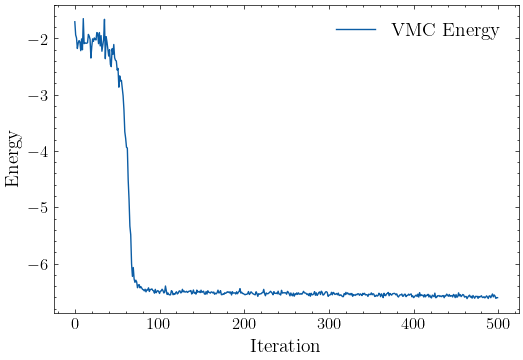

In [21]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(energies, label="VMC Energy")

ax.set_xlabel("Iteration", fontsize=14)
ax.set_ylabel("Energy", fontsize=14)
ax.tick_params(labelsize=12)
ax.legend(fontsize=14)